### Onde encontro outros DataSets?

Existem várias fontes comuns, mas o [Kaggle datasets](https://www.kaggle.com/datasets) é um dos melhores!

### O nosso exemplo: Boston Housing DataSet

Clicando [aqui](https://www.kaggle.com/c/boston-housing) você encontrará o nosso dataset em dois arquivos csv: train e test

O primeiro corresponde aos dados de treinamento do seu modelo, enquanto o segundo indica 


- __crim__ per capita crime rate by town.
- __zn__ proportion of residential land zoned for lots over 25,000 sq.ft.
- __indus__ proportion of non-retail business acres per town.
- __chas__ Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- __nox__ nitrogen oxides concentration (parts per 10 million).
- __rm__ average number of rooms per home.
- __age__ proportion of owner-occupied units built prior to 1940.
- __dis__ weighted mean of distances to five Boston employment centres.
- __rad__ index of accessibility to radial highways.
- __tax__ full-value property-tax rate per \$10,000.
- __ptratio__  pupil-teacher ratio by town.
- __black__ 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- __lstat__ lower status of the population (percent).
- __medv__ median value of owner-occupied homes in \$1000s.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### lidando com o pandas

In [42]:
trainDF = pd.read_csv('boston_train.csv')
testDF = pd.read_csv('boston_test.csv')

df = pd.concat([trainDF, testDF])

In [43]:
df.head()

,ID,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
0,1,65.2,396.90,0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1,6.575,296,18.0
1,2,78.9,396.90,0,0.02731,4.9671,7.07,9.14,21.6,0.469,17.8,2,6.421,242,0.0
2,4,45.8,394.63,0,0.03237,6.0622,2.18,2.94,33.4,0.458,18.7,3,6.998,222,0.0
3,5,54.2,396.90,0,0.06905,6.0622,2.18,5.33,36.2,0.458,18.7,3,7.147,222,0.0
4,7,66.6,395.60,0,0.08829,5.5605,7.87,12.43,22.9,0.524,15.2,5,6.012,311,12.5


analisando

In [48]:
df.describe()
df['medv'].describe()
#trainDF['medv'].describe()

#np.min(trainDF['medv'])
#np.max(trainDF['medv'])
#np.mean(trainDF['medv'])

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

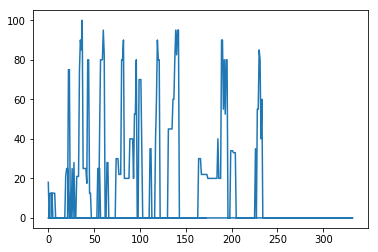

In [51]:
plt.plot(df['zn'])
plt.show()

In [50]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:

def getFeatures(linha):
    return [linha.zn, linha.crim, linha.rm, linha.nox, linha.age, linha.tax]

def getResultado(linha):
    return linha.medv

    
features = df.apply(lambda linha: getFeatures(linha), axis=1)
y = df.apply(lambda linha: getResultado(linha), axis=1)


0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
5      15.0
6      18.9
7      21.7
8      20.4
9      18.2
10     19.9
11     23.1
12     20.2
13     13.6
14     19.6
15     15.2
16     14.5
17     14.8
18     12.7
19     14.5
20     13.5
21     24.7
22     30.8
23     34.9
24     25.3
25     24.7
26     21.2
27     19.3
28     20.0
29     16.6
       ... 
143     NaN
144     NaN
145     NaN
146     NaN
147     NaN
148     NaN
149     NaN
150     NaN
151     NaN
152     NaN
153     NaN
154     NaN
155     NaN
156     NaN
157     NaN
158     NaN
159     NaN
160     NaN
161     NaN
162     NaN
163     NaN
164     NaN
165     NaN
166     NaN
167     NaN
168     NaN
169     NaN
170     NaN
171     NaN
172     NaN
Length: 506, dtype: float64


mais simples

In [181]:
df = df.fillna(df.median(axis=0))
def pegaTudo(linha):
    return [linha.zn, linha.crim, linha.rm, linha.nox, linha.age, linha.tax, linha.ptratio, linha.lstat], linha.medv

features, y = zip(*df.apply(lambda linha: pegaTudo(linha), axis=1))
features = np.array(features)
y = np.array(y)


In [182]:
from sklearn.preprocessing import MinMaxScaler
featureScaler = MinMaxScaler(feature_range=(0, 1))
yScaler = MinMaxScaler(feature_range=(0, 1))
features = featureScaler.fit_transform(features)
y = yScaler.fit_transform(y.reshape(-1, 1))

In [183]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=13)

In [184]:
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(404, 8)
(102, 8)
(404, 1)
(102, 1)


In [185]:
from keras.models import Model
from keras.layers import Dense
from keras.engine import Input


In [205]:
entrada = Input(shape=(x_train.shape[1], ), name='entrada')
x = Dense(10, activation = 'sigmoid', name='camada1')(entrada)
x = Dense(10, activation='sigmoid', name='camada2')(x)
x = Dense(10, activation='sigmoid', name='camada3')(x)
output = Dense(1, activation='linear', name='output')(x)

model = Model(inputs=[entrada], outputs=[output])
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (InputLayer)         (None, 8)                 0         
_________________________________________________________________
camada1 (Dense)              (None, 10)                90        
_________________________________________________________________
camada2 (Dense)              (None, 10)                110       
_________________________________________________________________
camada3 (Dense)              (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [210]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 1, epochs = 50)

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 1s - loss: 0.0986 - val_loss: 0.0901
Epoch 2/50
404/404 [==============================] - 1s - loss: 0.0979 - val_loss: 0.0878
Epoch 3/50
404/404 [==============================] - 1s - loss: 0.0952 - val_loss: 0.0866
Epoch 4/50
404/404 [==============================] - 1s - loss: 0.0947 - val_loss: 0.0865
Epoch 5/50
404/404 [==============================] - 1s - loss: 0.0940 - val_loss: 0.0873
Epoch 6/50
404/404 [==============================] - 1s - loss: 0.0926 - val_loss: 0.0864
Epoch 7/50
404/404 [==============================] - 1s - loss: 0.0939 - val_loss: 0.0869
Epoch 8/50
404/404 [==============================] - 1s - loss: 0.0917 - val_loss: 0.0864
Epoch 9/50
404/404 [==============================] - 1s - loss: 0.0924 - val_loss: 0.0870
Epoch 10/50
404/404 [==============================] - 1s - loss: 0.0932 - val_loss: 0.0877
Epoch 11/50
404/404 [======================

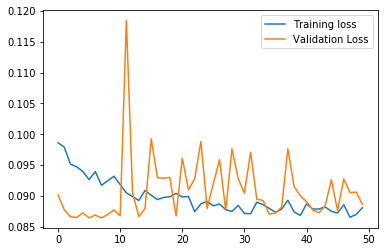

In [211]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [220]:
#score = model.evaluate(x_test, y_test, batch_size=16)
y_pred = model.predict(x_test)
print y_pred[:10]
print yScaler.inverse_transform(y_pred)[:10]



[[ 0.28404486]
 [ 0.42930639]
 [ 0.31867352]
 [ 0.48151159]
 [ 0.29488373]
 [ 0.48561907]
 [ 0.43687001]
 [ 0.52003151]
 [ 0.44049966]
 [ 0.33500004]]
[[ 17.78201866]
 [ 24.31878662]
 [ 19.34030724]
 [ 26.66802216]
 [ 18.26976776]
 [ 26.85285759]
 [ 24.65915108]
 [ 28.40141678]
 [ 24.82248497]
 [ 20.07500076]]
